<a href="https://colab.research.google.com/github/kaustubhhatkar/DataScience_and_MachineLearning/blob/master/Resume_Ranking_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing PyPDF2 Package for Extracting Text From the Pdf

In [37]:
pip install PyPDF2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
pip install wordninja


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
pip install stanza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [42]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Lets Connect the notebook to the google drive : 
(So that we wont have to upload the files again and again every time we open the Notebook)

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lets Import the Standard Packages

In [45]:
# Standard Packages
import io
import os
import re
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt


# Reading Datasets From the uploaded files


In [46]:
#text extraction from pdf :
import PyPDF2 
from PyPDF2 import PdfReader
reader = PdfReader(open(r"drive/MyDrive/Dataset/Test/candidate_004.pdf", "rb"))
text=reader.pages[0].extract_text()


In [47]:
print(text)

OLIVIA SANTOS
CONSULTANT ANALYST
WORK EXPERIENCE
Cognizant, Apr 2020 - OngoingConsultant
Collaborating with different business units to collect data
and find optimal solutions both for production as well as
delivery level. Finding the best ways in which projects can
be managed and giving a better outlook towards entire
development departement.
Cognizant,Dec 2018 - Mar 2019Software Developer Analyst
Worked as a software developer and analyst for various
projects concerned with middleware. Actively participated
in the development cycle and end to end needs of the
projects.
ACADEMIC PROFILE
B.tech Electrical Engineering, 2018Bhubaneshwar Institute of TechnologyEXECUTIVE
SUMMARY
Data Engineer and solution
specialist. Focused on using data
building and data driven
production ready procedures.
PERSONAL
SKILLS
Machine Learning, Data Analytics,
Project Management, Software
Development, Agile Methodology,
Business Growth.
EXTRA-CURRICULARS
EXTRA-CURRICULARS


Now we have multiple pdfs to extract ,Lets Write A function :

In [48]:
def extract_text_from_pdf(path):
  dataframe=[];
  for filename in os.listdir(path):
    reader = PdfReader(open(r''+path+filename, "rb"));
    text=reader.pages[0].extract_text();
    dataframe.append(text)
  return dataframe;

def candidate(path):
  candidate_no=[];
  for filename in os.listdir(path):
    candidate_no.append(filename)
  return candidate_no

In [49]:
train_path="drive/MyDrive/Dataset/Train/";
test_path="drive/MyDrive/Dataset/Test/";
jd_path="drive/MyDrive/Dataset/JD/";

description_train=pd.Series(extract_text_from_pdf(train_path)).values
description_test=pd.Series(extract_text_from_pdf(test_path)).values
jd=pd.Series(extract_text_from_pdf(jd_path)).values

In [50]:
print(description_train)

['LISA JENNINGS\nPROFILE\nA highly disciplined and hard-working individual seeking\nchallenging opportunity in the field of data science and\ndata analytics where I can utilize my skills and knowledge to\ncontribute for the growth of the organizationSKILLS\nData Analysis, Data Visualization, Data Structures,\nDeep Learning, Machine Learning, Artificial\nIntelligence, Linear Regression, Statistical\nModeling, Predictive Modeling, Algorithms, Python,\nHive, SQL, Java, Tableau, Big Data, Hadoop, C++,\nANN.\nEXPERIENCE\nSahara Medica \nIntern Dec 2019- May 2020\n \nModel Employee retention factor to employee\nsatisfaction.EDUCATION\nB.Tech, Visveswaraiah Technological\nUniversity (VTU) in 2019 JUNIOR INTERN\nACTIVITIES\nData Science using Machine Learning\nwith R and Python.\nDATA ANALYTICS.PROJECTS\nBUILDING PREDICTION MODEL TO\nPREDICT THE IMPACT OF THE INCIDENT\nRAISED BY THE CUSTOMER'
 'AMELIA BAKER\nPROFILE\nCoercive and determined individual. Understanding\nand working on challenging

In [51]:
candidate_train=candidate(train_path)
candidate_test=candidate(test_path)

In [52]:
candidate_train=[s.strip('.pdf') for s in candidate_train]  
candidate_test=[s.strip('.pdf') for s in candidate_test]

In [53]:
print(candidate_train)
print(candidate_test)

['candidate_124', 'candidate_020', 'candidate_127', 'candidate_079', 'candidate_046', 'candidate_093', 'candidate_105', 'candidate_002', 'candidate_000', 'candidate_011', 'candidate_023', 'candidate_110', 'candidate_100', 'candidate_026', 'candidate_003', 'candidate_080', 'candidate_097', 'candidate_089', 'candidate_008', 'candidate_121', 'candidate_006', 'candidate_063', 'candidate_129', 'candidate_115', 'candidate_012', 'candidate_032', 'candidate_022', 'candidate_082', 'candidate_001', 'candidate_050', 'candidate_025', 'candidate_024', 'candidate_049', 'candidate_030', 'candidate_057', 'candidate_087', 'candidate_071', 'candidate_009', 'candidate_062', 'candidate_027', 'candidate_068', 'candidate_106', 'candidate_116', 'candidate_109', 'candidate_070', 'candidate_047', 'candidate_060', 'candidate_072', 'candidate_086', 'candidate_064', 'candidate_052', 'candidate_104', 'candidate_010', 'candidate_007', 'candidate_067', 'candidate_065', 'candidate_037', 'candidate_034', 'candidate_08

Lets Create a new Data Frame


In [54]:
df=pd.DataFrame(list(zip(candidate_train,description_train)),columns=['CandidateID','Description'])

In [55]:
df

,CandidateID,Description
0,candidate_124,LISA JENNINGS\nPROFILE\nA highly disciplined a...
1,candidate_020,AMELIA BAKER\nPROFILE\nCoercive and determined...
2,candidate_127,PROFILE\nSoftware developer working as a cloud...
3,candidate_079,JULIA CHEN\nJUNIOR ENGINEER\nWORK EXPERIENCE\n...
4,candidate_046,HOWARD GOODMAN\nFRESHER AND NLP ENGINEER\nPROF...
...,...,...
85,candidate_144,BENJAMIN OSTA\nFRESHER DEVELOPER\nPROFESSIONAL...
86,candidate_138,One97 Communications Limited \nData Scientist ...
87,candidate_136,TIMOTHY PETERSON\nSOFTWARE DEVELOPER INTERN\nW...
88,candidate_148,PROFILE\nA data science professional with 1 ye...


In [56]:
df2=pd.DataFrame(list(zip(candidate_test,description_test)),columns=['CandidateID','Description'])

In [57]:
df2

,CandidateID,Description
0,candidate_058,SEBASTIAN GOLER\nASSOCIATE DATA MANAGER\nWORK ...
1,candidate_146,LEHNA PATRICK\nPROFILE\nI have worked on grass...
2,candidate_103,TESSA MAERS\nPROFILE\nA strategic analyst whos...
3,candidate_029,Eli Scott\nF R E S H E R\nExecutive Profile\nS...
4,candidate_045,PROFILE\nYoung Aspirant looking for roles in d...
5,candidate_120,PROFILE\nCompleted BSc in STATISTICS from the ...
6,candidate_091,CASH FLORES\nPROFILE\nMachine learning Enthusi...
7,candidate_119,Willfred Dixon\nASSOCIATE DATA ANALYST\nExecut...
8,candidate_112,Loyalty Rewards Management. Pvt. Ltd. \nBusin...
9,candidate_033,CHARLES RODRIGUEZ\nSOFTWARE AND PROJECT MANAGE...


Reading Data From the Training csv File For Training the Model

In [58]:
train=pd.read_csv(open(r"drive/MyDrive/Dataset/train.csv", "rb"))

In [59]:
print(train)

      CandidateID  Match Percentage
0   candidate_011             13.60
1   candidate_113             36.63
2   candidate_123             54.93
3   candidate_012             41.46
4   candidate_002             48.91
..            ...               ...
85  candidate_133             54.20
86  candidate_137             60.18
87  candidate_072             44.94
88  candidate_140             11.41
89  candidate_037             56.70

[90 rows x 2 columns]


Matching Data According to the Candidate ID


In [60]:
train=train.sort_values(by=['CandidateID'])
df=df.sort_values(by=['CandidateID'])

In [61]:
train

,CandidateID,Match Percentage
67,candidate_000,13.70
68,candidate_001,40.09
4,candidate_002,48.91
55,candidate_003,36.89
6,candidate_006,44.96
...,...,...
11,candidate_144,6.00
35,candidate_145,47.08
58,candidate_147,11.53
37,candidate_148,60.11


In [62]:
df=df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
df=df.drop(['index'], axis=1)

In [63]:
print(df)

      CandidateID                                        Description
0   candidate_000  JACOB SMITH\nF R E S H E R\nSKILLS\nPython, SQ...
1   candidate_001  Brianna Williams\nJUNIOR DEVELOPER\nExecutive ...
2   candidate_002  AMZ Loans and Mortgages\nERC Analytics, Jun 20...
3   candidate_003  PROFILE\nExtremely motivated to constantly dev...
4   candidate_006  JENNIFER ARMSTRONG\nPROFILE\nFresher Computer ...
..            ...                                                ...
85  candidate_144  BENJAMIN OSTA\nFRESHER DEVELOPER\nPROFESSIONAL...
86  candidate_145  Coca-COla\n Big Data Analyst, Nov 2019 to Till...
87  candidate_147  Jaroslav Chechnik\nF R E S H E R\nExecutive Pr...
88  candidate_148  PROFILE\nA data science professional with 1 ye...
89  candidate_149  MIRAD YASTEIN\nANALYST INTERN\nSKILLS\nArtific...

[90 rows x 2 columns]


In [64]:
train=train.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

In [65]:
train

,index,CandidateID,Match Percentage
0,67,candidate_000,13.70
1,68,candidate_001,40.09
2,4,candidate_002,48.91
3,55,candidate_003,36.89
4,6,candidate_006,44.96
...,...,...,...
85,11,candidate_144,6.00
86,35,candidate_145,47.08
87,58,candidate_147,11.53
88,37,candidate_148,60.11


In [66]:
train["Description"]=df["Description"]

In [67]:
print("Train Dataset :\n")
print(train)
df3=train

Train Dataset :

    index    CandidateID  Match Percentage  \
0      67  candidate_000             13.70   
1      68  candidate_001             40.09   
2       4  candidate_002             48.91   
3      55  candidate_003             36.89   
4       6  candidate_006             44.96   
..    ...            ...               ...   
85     11  candidate_144              6.00   
86     35  candidate_145             47.08   
87     58  candidate_147             11.53   
88     37  candidate_148             60.11   
89     27  candidate_149             41.20   

                                          Description  
0   JACOB SMITH\nF R E S H E R\nSKILLS\nPython, SQ...  
1   Brianna Williams\nJUNIOR DEVELOPER\nExecutive ...  
2   AMZ Loans and Mortgages\nERC Analytics, Jun 20...  
3   PROFILE\nExtremely motivated to constantly dev...  
4   JENNIFER ARMSTRONG\nPROFILE\nFresher Computer ...  
..                                                ...  
85  BENJAMIN OSTA\nFRESHER DEVELOPER\n

In [68]:
print("Test Dataset : ")
test=df2
print(test)


Test Dataset : 
      CandidateID                                        Description
0   candidate_058  SEBASTIAN GOLER\nASSOCIATE DATA MANAGER\nWORK ...
1   candidate_146  LEHNA PATRICK\nPROFILE\nI have worked on grass...
2   candidate_103  TESSA MAERS\nPROFILE\nA strategic analyst whos...
3   candidate_029  Eli Scott\nF R E S H E R\nExecutive Profile\nS...
4   candidate_045  PROFILE\nYoung Aspirant looking for roles in d...
5   candidate_120  PROFILE\nCompleted BSc in STATISTICS from the ...
6   candidate_091  CASH FLORES\nPROFILE\nMachine learning Enthusi...
7   candidate_119  Willfred Dixon\nASSOCIATE DATA ANALYST\nExecut...
8   candidate_112  Loyalty Rewards Management. Pvt. Ltd.  \nBusin...
9   candidate_033  CHARLES RODRIGUEZ\nSOFTWARE AND PROJECT MANAGE...
10  candidate_044  LEAH ATKIN\nJUNIOR DEVELOPER\nWORK EXPERIENCE\...
11  candidate_039  NICOLE BREWER\nPOST GRADUATE BUSINESS\nANALYST...
12  candidate_018  EVELYNN ADAMS\nGRADUATE FRESHER\nPROFESSIONAL ...
13  candidate_042 

#Here we start with the TEXT PREPROCESSING


#STEP 1 : WORD FORMATTING :
#STEP 2 : SPELLING CORRECTION
#STEP 3 : REMOVE STOPWORDS
#STEP 4 : LEMMATIZATION 
#STEP 5 : REMOVING PUNCTUATIONS :
#STEP 6 : LOWER CASE CONVERSION
#STEP 7 : REMOVE DUPLICATE WORDS 
#STEP 8 : REMOVE NUMBERS :
#STEP 9 : Remove single characters :
#STEP 10 : Remove Extra Spaces :


In [69]:

import wordninja

def no_space(text):
    """
    Return :- string removing all spaces
    Input :- string
    Output:- string
    """
    single_char_pattern = r'\s+'
    without_space = re.sub(pattern=single_char_pattern, repl="", string=text)
    return without_space

def rejoin_words(text):
    """
    Target : to join the splitted words 
             to find the meaningful words
    Return :- string after joining the splitted words
    Input :- string
    Output :- string
    """
    pattern = r'\s+'
    char = no_space(text)
    word = wordninja.split(char)
    
    return ' '.join(word)


import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_no_ssplit=True, tokenize_pretokenized=True)    
# tokenize_no_ssplit=True to recognize only newline "\n\n"
# tokenize_pretokenized=True to recognize "\n"

def word_formatting(text) :
    doc = nlp(text)
    length = len(doc.sentences)
    sentence=""
    line = "\n"
    for i in range(length):  
        if i>0 and i<=3:                             # do not need names
            sentence+=doc.sentences[i].text+"\n"
        elif i>3:
            line += doc.sentences[i].text+"\n"
    text = rejoin_words(sentence)
    text = text + " " + line
    
    pattern1 = "E D U C A T I O N"
    pattern2 = "A C T I V I T I E S"
    pattern3 = "E X P E R I E N C E"
    pattern4 = "P R O J E C T S"
    pattern5 = "A N D A W A R D S"
    pattern6 = "I am"
    pattern7 = "●"
    pattern8 = "13585"
    pattern9 = "ABC"
    word1 = "nlp"
    word2 = "ml"
    word3 = "ai"
    text = re.sub(pattern1 , "Education" , text)
    text = re.sub(pattern2 , "Activity" , text)
    text = re.sub(pattern3 , "Experience" , text)
    text = re.sub(pattern4 , "Project" , text)
    text = re.sub(pattern5 , "" , text) 
    text = re.sub(pattern6 , "" , text)
    text = re.sub(pattern7 , "" , text)
    text = re.sub(pattern8 , "" , text)
    text = re.sub(word1.upper() , "natural language process" , text)
    text = re.sub(word1.lower() ,"natural language process",text)
    text = re.sub(word2.upper() , "machine learn" , text)
    text = re.sub(word2.lower() , "machine learn" , text)
    text = re.sub(word3.upper() , "artificial intelligence" , text)
    text = re.sub(word3.lower() , "artificial intelligence" , text)
    
    return text

INFO:stanza:Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

INFO:stanza:Use device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Done loading processors!


In [70]:
# Implementation of spelling correction using python pyspellchecker library

# from spellchecker import SpellChecker

# spell_corrector = SpellChecker()

# # spelling correction using spellchecker
# def spell_correction(text):
#     """
#     Return :- text which have correct spelling words
#     Input :- string
#     Output :- string
#     """
#     # initialize empty list to save correct spell words
#     correct_words = []
#     # extract spelling incorrect words by using unknown function of spellchecker
#     misSpelled_words = spell_corrector.unknown(text.split())

#     for each_word in text.split():
#         if each_word in misSpelled_words:
#             right_word = spell_corrector.correction(each_word)
#             correct_words.append(right_word)
#         else:
#             correct_words.append(each_word)

#     for i in correct_words:
#       print(i)
#     # joining correct_words list into single string
#     correct_spelling = ' '.join(correct_words)
#     return correct_spelling
from textblob import TextBlob


def correct_sentence_spelling(sentence):
    
    sentence = TextBlob(sentence)
    
    result = sentence.correct()
    
    print(result)

In [71]:

# Implementation of removing stopwords using all stop words from nltk, spacy, gensim


import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
import spacy
import gensim

def remove_stopwords(text):
    """
    Return :- String after removing stopwords
    Input :- String
    Output :- String
    """
    text_without_sw = []
    # tokenization
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        # checking word is stopword or not
        if word not in all_stopwords:
            text_without_sw.append(word)

    # joining all tokens after removing stop words
    without_sw = ' '.join(text_without_sw)
    return without_sw

# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))
sp = spacy.load('en_core_web_sm')
# list of stopwords from spacy
stopwords_spacy = list(sp.Defaults.stop_words)
# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)
# all unique stop words
all_stopwords = list(set(all_stopwords))
print("Total number of Stopwords :- ", len(all_stopwords))
print("List of stopwords : ", all_stopwords)

Total number of Stopwords :-  413
List of stopwords :  ["'s", 'up', "needn't", 'theirs', 'herein', 'whose', "that'll", 'whence', 'thereafter', 'would', 'least', 'without', 'interest', 'even', 'that', "it's", 'some', "wouldn't", 'done', 'whither', 'a', 'system', 'found', 'how', 'hadn', 'seeming', '’s', 'etc', 'been', 'into', 'towards', 'keep', 'go', '‘s', 'eight', 'make', 'why', 'above', 'find', '‘d', 'ourselves', 'really', "shan't", 'being', '’re', 'thin', 'me', 'from', 'bill', 'most', 'sixty', 'eg', 'indeed', 'anyway', 'does', "shouldn't", 'not', "should've", 'this', 'over', 'off', "doesn't", 'twelve', 'just', 'against', 'somewhere', 'should', 'around', 'anyone', 's', 'wherever', 'six', 'be', 'm', 'ma', 'what', 'afterwards', 'could', 'except', 'fill', 'besides', 'shouldn', 'several', 'elsewhere', 'latter', 'for', '‘ll', 'using', 'thick', 'again', 'hundred', 'behind', 'first', 'one', 'her', 'did', '’ve', '‘m', 'among', 'nowhere', 'than', 'these', 'therefore', 'wouldn', 'describe', 'nex

In [72]:


# Implementation of Lemmatization using nltk :

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):          # It was trained with treebank_tag

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''
    

def lemmatization(text):
    """
    Result :- string after stemming
    Input :- String
    Output :- String
    """
    # word tokenization
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        # lemma word
        lemma_word = lemma.lemmatize(tokens[index],wordnet.ADJ)
        tokens[index] = lemma_word
    text = " ".join(tokens)
    
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        lemma_word = lemma.lemmatize(tokens[index],wordnet.VERB)
        tokens[index] = lemma_word
    text = " ".join(tokens)
    
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        lemma_word = lemma.lemmatize(tokens[index],wordnet.NOUN)
        tokens[index] = lemma_word
    text = " ".join(tokens) 
    
    tokens = word_tokenize(text)
    for index in range(len(tokens)):
        lemma_word = lemma.lemmatize(tokens[index],wordnet.ADV)
        tokens[index] = lemma_word
    return " ".join(tokens)


# initialize lemmatizer object
lemma = WordNetLemmatizer()

In [73]:


# Implementation of removing punctuations using string library

from string import punctuation

def remove_punctuation(text):
    """
    Return :- String after removing punctuations
    Input :- String
    Output :- String
    """
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    new_words = tokenizer.tokenize(text)

    return ' '.join(new_words)

In [74]:
# Converting to lower case :

def lower_case_conversion(text):
    """
    Input :- string
    Output :- lowercase string
    """
    lower_text = text.lower()
    return lower_text

In [75]:
# Remove duplicate words :


def remove_duplicate(text):
    words = text.split()
    return " ".join(sorted(set(words), key=words.index))

In [76]:
# Remove numbers from text :

def remove_numbers(text):
    """
    Return :- String without numbers
    input :- String
    Output :- String
    """
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

In [77]:
# Remove single characters :


def remove_single_char(text):
    """
    Return :- string after removing single characters
    Input :- string
    Output:- string
    """
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [78]:
# Removing Extra Whitespaces

import re

def remove_extra_spaces(text):
    """
    Return :- string after removing extra whitespaces and double spaces
    Input :- String
    Output :- String
    """
    space_pattern = r'\s+'
    without_space = re.sub(pattern=space_pattern , repl=" ", string=text)
    return without_space


#Preparing Text Cleaning Function: 

In [79]:
def text_preprocess(text):
    """
    preparing stages of operation :
     1> words formatting
     2> spelling correction
     3> remove stopwords/noisywords like 'a,and,to..etc'
     4> lemmatizationm
     5> remove punctuation 
     6> lower case conversion
     7> remove duplicates
     8> remove numbers
     9> remove single char
     10> remove extra spaces
    """
    value = word_formatting(text)
    # value = spell_correction(value)
    value = remove_stopwords(value)
    value = lemmatization(value)
    value = remove_punctuation(value)
    value = lower_case_conversion(value)
    value = remove_duplicate(value)
    value = remove_numbers(value)
    value = remove_single_char(value)
    value = remove_extra_spaces(value)
    
    return value 

#Applying Preprocessing :

In [80]:
# for train data :
text = []
for value in train.Description:
    text.append(text_preprocess(value))
train['new_Description'] = text

# for test data :
text = []
for value in test.Description:
    text.append(text_preprocess(value))
test['new_Description'] = text 

# for job description :
Job_Description = text_preprocess(''.join(jd))
Job_Description = remove_punctuation(Job_Description)

# removing unnecessary variable:
del text

#Displaying the cleaned result

In [81]:
print("Before cleaning Job Description file :" , jd)
print("\n After cleaning Job Description file :",Job_Description)
print("\nBefore cleaning train resume file of ",train['CandidateID'][0]," :\n",df3['Description'][0])
print("\nAfter cleaning train resume file of ",train['CandidateID'][0]," :\n",train['new_Description'][0])
print("\nBefore cleaning train resume file of ",test['CandidateID'][0]," :\n",df2['Description'][0])
print("\nAfter cleaning train resume file of ",test['CandidateID'][0]," :\n",test['new_Description'][0])

Before cleaning Job Description file : ["Machine Learning Engineering\n13585ABC\nKnowledge and Innovation\nWhat you’ll do\nYou will focus on researching, building, and designing\nself-running artificial intelligence (AI)\nsystems to automate predictive models. You are responsible\nto design and create the AI\nalgorithms capable of learning and making predictions\nthat define machine learning (ML).\nExperience and qualifications\n●\nBachelor's or Master's degree (mention the course\nas per requirement)\n●\n0-2 years of work experience providing analytics solutions\nin a commercial setting\nTechnical expertise\nMust have\n●\nMachine Learning, Clustering, Logistic Regression,\nClassification\n●\nDifferent libraries such as SciKit Learn, NumPy, Pandas,\nMatplotlib, Seaborn\n●\nDeep learning frameworks such as Tensorflow, Keras,\nPyTorch and application of Neural\nNetworks and models. CNN, RNN, GANs\n●\nFamiliar with Natural Language Processing and associated\nlibraries like NLTK, SpaCy,\nB

#Uptil here we have successfully removed the unused noisy words from the text
#Lets Perform Analysis Now

Preparing wordclouds

In [82]:
from wordcloud import WordCloud
from functools import reduce

wordfreqdist = nltk.FreqDist(nltk.word_tokenize("".join(Job_Description)))
wordfreqdist2 = nltk.FreqDist(nltk.word_tokenize("".join(train.Description)))
wordfreqdist3 = nltk.FreqDist(nltk.word_tokenize("".join(test.Description)))

combined_wordfreqdist = nltk.FreqDist(nltk.word_tokenize("".join(Job_Description)+
                                                          "".join(train.Description)+"".join(test.Description)))
mostcommon = combined_wordfreqdist.most_common(50)
print("Most common words in the combined data : ",mostcommon)

Most common words in the combined data :  [(',', 2214), ('and', 604), ('.', 599), ('Data', 405), ('to', 362), ('Learning', 319), ('of', 277), ('in', 274), ('Machine', 269), ('a', 222), ('the', 215), ('data', 192), ('(', 190), (')', 190), ('for', 190), ('I', 172), ('Python', 168), ('on', 162), ('Analysis', 153), ('from', 144), ('with', 140), ('2019', 119), ('SKILLS', 109), ('using', 108), ('-', 105), ('2020', 102), ('learning', 96), ('B.Tech', 88), ('Deep', 85), ('PROFILE', 85), ('Analytics', 80), ('EXPERIENCE', 75), ('Science', 74), ('as', 68), ('Business', 67), ('Analyst', 66), ('Processing', 66), ('based', 65), ('Software', 64), ('Engineer', 61), ('&', 61), ('AND', 60), ('SQL', 59), ('Natural', 59), ('R', 58), ('ACTIVITIES', 58), ('am', 58), ('University', 55), ('an', 53), ('Language', 52)]


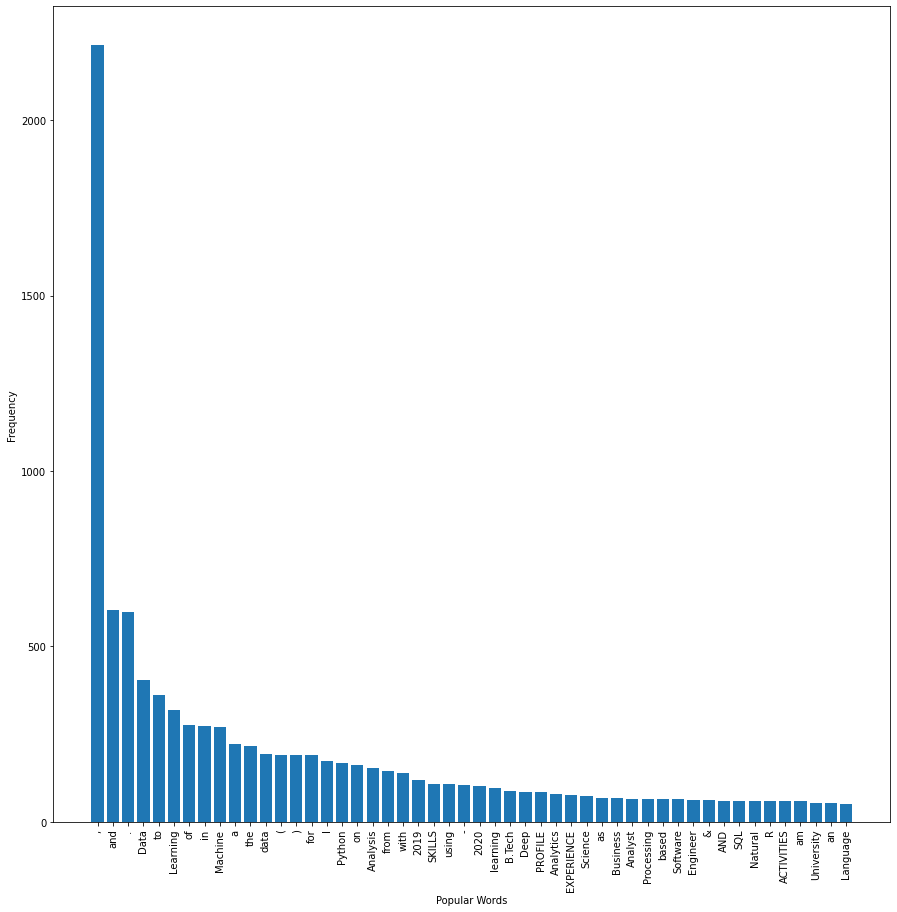

In [83]:
# Plot the most common 30 words :
popular_words = []
Freq = []
for i in mostcommon[0:50]:
    popular_words.append(i[0])
    Freq.append(i[1])
plt.figure(figsize=(15,15))
plt.bar(popular_words , Freq )
plt.xlabel(xlabel="Popular Words")
plt.ylabel(ylabel="Frequency")
plt.xticks(rotation = 90)
plt.rc('xtick', labelsize = 12) 
plt.rc('ytick', labelsize = 12) 
plt.rc('axes', labelsize = 12)
plt.show()

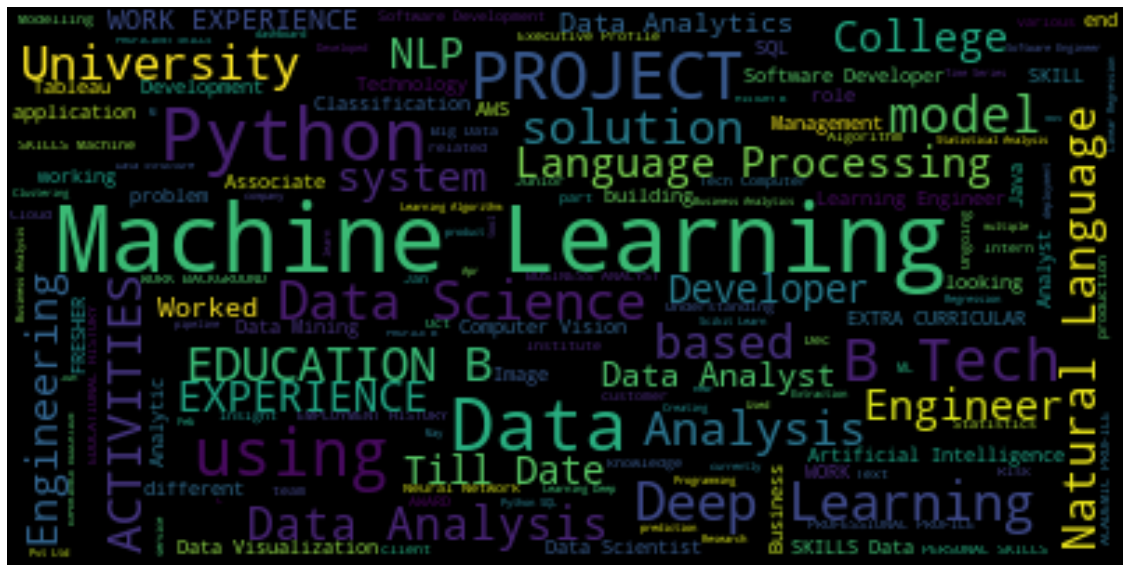

In [84]:
wc = WordCloud().generate("".join(Job_Description)+ "".join(train.Description)+
                          "".join(test.Description))              # wordcloud is generated
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [85]:
reduce(np.intersect1d , (pd.Series(wordfreqdist).index.unique() , pd.Series(wordfreqdist2).index.unique(),
                        pd.Series(wordfreqdist3).index.unique()))

array(['algorithm', 'analysis', 'analytical', 'analytics', 'application',
       'big', 'build', 'classification', 'computer', 'course', 'create',
       'data', 'deep', 'degree', 'deploying', 'deployment', 'design',
       'detection', 'different', 'engineer', 'experience', 'familiar',
       'feature', 'intelligence', 'keras', 'knowledge', 'language',
       'learn', 'learning', 'like', 'machine', 'make', 'model', 'models',
       'natural', 'networks', 'prediction', 'predictive', 'process',
       'processing', 'production', 'provide', 'reduce', 'regression',
       'requirement', 'research', 'scale', 'science', 'selection',
       'solution', 'system', 'technical', 'tools', 'vision', 'work',
       'year'], dtype=object)

In [86]:
# normalizing :
def text_normalize(text):
    text = re.sub("analytics","analyze",text)
    text = re.sub("analytic","analyze",text)
    text = re.sub("like" , "" , text)
    text = re.sub("analytical","analyze",text)
    text = re.sub("analysis","analyze",text)
    text = re.sub("clustering","cluster",text)
    text = re.sub("deployment","deploy",text)
    text = re.sub("detection","detect",text)
    text = re.sub("learning","learn",text)
    text = re.sub("models","model",text)
    text = re.sub("methodology","method",text)
    text = re.sub("prediction","predict",text)
    text = re.sub("predictive","predict",text)
    text = re.sub("processing","process",text)
    text = re.sub("production","product",text)
    text = re.sub("requirement","require",text)
    text = re.sub("selection","select",text)
    text = re.sub("transformers","transformer",text)
    text = re.sub("type","",text)

    return text


# Normalization on datasets :

# for train data :
text = []
for value in train.Description:
    text.append(remove_extra_spaces(remove_duplicate(text_normalize(value))))
train['Description'] = text

# for test data :
text = []
for value in test.Description:
    text.append(remove_extra_spaces(remove_duplicate(text_normalize(value))))
test['Description'] = text 

# for job description :
Job_Description = remove_extra_spaces(remove_duplicate(text_normalize(''.join(Job_Description))))

Lets match keywords in each row representating resume of each candidates in the train and test datasets with job descriptio

In [87]:
def match_keywords(text):     # matching each resume with 'Job Description'
    line = []
    for val in text :
        keywords = nltk.FreqDist(nltk.word_tokenize("".join(val)))
        match_words = reduce(np.intersect1d , (pd.Series(keywords).index.unique() , 
                                               pd.Series(wordfreqdist).index.unique()))
        match_words = np.array(match_words).reshape(-1)
        line.append(" ".join(match_words))
    return line

In [88]:
train['match_words'] = match_keywords(train['Description'].values)
test['match_words'] = match_keywords(test['Description'].values)

print("Train sample of row 1 :" , train['match_words'][1])
print("Test sample of row 1 :" ,test['match_words'][1])

Train sample of row 1 : data experience knowledge learn machine make solution
Test sample of row 1 : classification data design knowledge learn machine model research


Model Build :Tf-idf (Term Frequency Inverse Document Frequency) vectorizer of words:

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer()
model.fit_transform(["".join(Job_Description)])

t = model.transform([Job_Description])
t = t.todense()
t = np.array(t).reshape(-1)

def similarity(arr):
    match=[]
    for val in arr:
        score = model.transform([val])
        score = score.todense()[0]
        score = np.array(score).reshape(-1)
        match.append(round(cosine(score,t),2))
    return match

    
# cosine similarity / centralized pearson correlation :

def cosine(u, v):
    return np.dot(u, v)*100 / (np.linalg.norm(u) * np.linalg.norm(v))

Model Performance

In [90]:
print("Model report on match percentage on train data :",np.array(similarity(train['match_words'])).tolist())
print("\nActual match percentage on train data :",np.array(train['Match Percentage']).tolist())
print("\nEvaluation based on centralized pearson correlation :",
      cosine(train['Match Percentage'] , similarity(train['match_words']))/100)

Model report on match percentage on train data : [16.74, 25.58, 16.74, 13.67, 23.68, 19.33, 23.68, 16.74, 21.62, 13.67, 19.33, 13.67, 13.67, 16.74, 23.68, 27.34, 21.62, 13.67, 30.57, 23.68, 21.62, 19.33, 21.62, 19.33, 21.62, 13.67, 13.67, 13.67, 23.68, 23.68, 19.33, 16.74, 21.62, 21.62, 16.74, 29.0, 25.58, 16.74, 29.0, 25.58, 9.67, 13.67, 23.68, 25.58, 19.33, 19.33, 13.67, 16.74, 19.33, 9.67, 19.33, 13.67, 16.74, 19.33, 21.62, 21.62, 19.33, 19.33, 16.74, 25.58, 13.67, 29.0, 19.33, 19.33, 19.33, 9.67, 25.58, 16.74, 23.68, 25.58, 23.68, 33.49, 29.0, 16.74, 23.68, 21.62, 23.68, 23.68, 13.67, 16.74, 23.68, 23.68, 21.62, 27.34, 21.62, 21.62, 21.62, 9.67, 23.68, 13.67]

Actual match percentage on train data : [13.7, 40.09, 48.91, 36.89, 44.96, 37.8, 56.79, 58.0, 40.64, 13.6, 41.46, 52.6, 8.01, 35.37, 52.46, 54.46, 48.49, 46.38, 43.17, 38.83, 41.6, 10.11, 14.14, 48.7, 56.7, 39.95, 4.81, 55.72, 40.86, 11.3, 13.48, 50.59, 50.36, 57.8, 44.01, 42.91, 35.18, 46.44, 53.66, 48.2, 6.46, 50.82, 51.24,

Prediction of Match Percentage of Job Description in the test data containing 60 resumes of candidates :

In [91]:
t =similarity(test['match_words'])
print("Model report on match percentage on test data :", np.array(t.tolist()))

AttributeError: ignored

In [92]:
output = pd.DataFrame({'CandidateID': test['CandidateID'],
                       'Match Percentage' : t})
output=output.sort_values(by=['Match Percentage'],ascending=[False])

In [93]:
output

,CandidateID,Match Percentage
19,candidate_132,34.86
9,candidate_033,27.34
41,candidate_014,27.34
1,candidate_146,27.34
27,candidate_019,27.34
23,candidate_056,27.34
48,candidate_090,27.34
25,candidate_125,25.58
49,candidate_016,25.58
59,candidate_114,25.58


In [94]:
output.to_csv(os.path.join("drive/MyDrive/Dataset/", ‘output.csv’))


SyntaxError: ignored